# **1. Import Dependencies**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **2. Hyperparameters**

In [2]:
NUM_TIMES = 100
NUM_SELLERS = 200
NUM_BUYERS = 200
NUM_BINS = 10

FEAR = 0.1
GREED = 0.05

# **3. Initialization**

In [3]:
# PDF function
def pdf_1(x):
    return 1 - x

# Number of samples
num_samples = 10000

# Discretize the distribution
x_values = np.linspace(0, 1, 1000)
probabilities = pdf_1(x_values)
probabilities /= probabilities.sum()  # Normalize to make it a valid probability distribution

# Generate random samples using numpy.random.choice
buyer_max = np.array(np.random.choice(x_values, size=NUM_BUYERS, p=probabilities))

buyer_max

array([0.55255255, 0.24424424, 0.44444444, 0.14214214, 0.84984985,
       0.17117117, 0.24824825, 0.63063063, 0.12812813, 0.22522523,
       0.76376376, 0.01401401, 0.07707708, 0.42642643, 0.01801802,
       0.41441441, 0.33833834, 0.15415415, 0.23823824, 0.77977978,
       0.25825826, 0.18118118, 0.47847848, 0.7977978 , 0.10610611,
       0.28828829, 0.3013013 , 0.10910911, 0.02602603, 0.0970971 ,
       0.5955956 , 0.49149149, 0.01501502, 0.08208208, 0.28328328,
       0.13213213, 0.48648649, 0.001001  , 0.04204204, 0.23623624,
       0.08308308, 0.72472472, 0.01901902, 0.52952953, 0.32132132,
       0.34634635, 0.04604605, 0.14714715, 0.04604605, 0.002002  ,
       0.48048048, 0.14414414, 0.4004004 , 0.48948949, 0.51951952,
       0.73273273, 0.5035035 , 0.66366366, 0.29229229, 0.7037037 ,
       0.79079079, 0.27127127, 0.48448448, 0.33233233, 0.19419419,
       0.15815816, 0.34334334, 0.003003  , 0.20920921, 0.43343343,
       0.72772773, 0.15815816, 0.27527528, 0.76076076, 0.12012

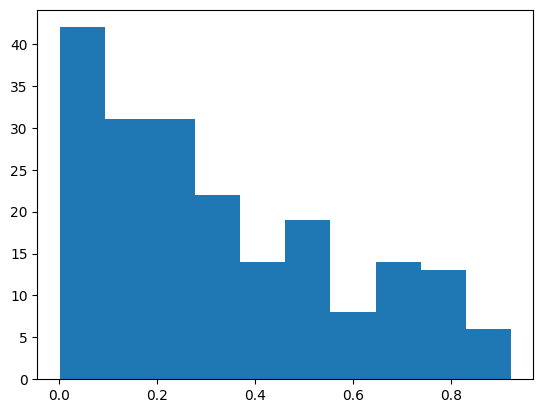

In [4]:
plt.hist(buyer_max, bins=NUM_BINS)
plt.show()

In [5]:
y_values = np.linspace(0, 1, 1000)

# Discretize the distribution
probabilities = np.linspace(0, 1, 1000)
probabilities /= probabilities.sum()  # Normalize to make it a valid probability distribution

# Generate random samples using numpy.random.choice
seller_min = np.array(np.random.choice(y_values, size=NUM_SELLERS, p=probabilities))

seller_min

array([0.5995996 , 0.8978979 , 0.55055055, 0.89289289, 0.61761762,
       0.94494494, 0.79479479, 0.67467467, 0.8968969 , 0.66166166,
       0.91791792, 0.82982983, 0.5955956 , 0.83383383, 0.36436436,
       0.12912913, 0.25325325, 0.98298298, 0.62962963, 0.81181181,
       0.46446446, 0.85285285, 0.26426426, 0.92092092, 0.24424424,
       0.14714715, 0.92592593, 0.81781782, 0.75775776, 0.98898899,
       0.43143143, 0.88688689, 0.42842843, 0.31631632, 0.67767768,
       0.82982983, 0.78778779, 0.85185185, 0.998999  , 0.6026026 ,
       0.98398398, 0.4044044 , 0.74274274, 0.83083083, 0.64764765,
       0.2962963 , 0.78578579, 0.94094094, 0.36336336, 0.87187187,
       0.95095095, 0.71771772, 0.86186186, 0.85485485, 0.92392392,
       0.61861862, 0.97397397, 0.11511512, 0.19019019, 0.62862863,
       0.32432432, 0.98598599, 0.94994995, 0.53153153, 0.80880881,
       0.94294294, 0.42042042, 0.35735736, 0.53753754, 0.33533534,
       0.73573574, 0.22422422, 0.76976977, 0.52552553, 0.91891

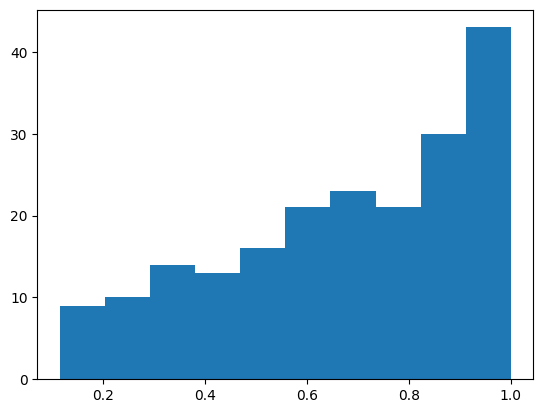

In [6]:
plt.hist(seller_min, bins=NUM_BINS)
plt.show()

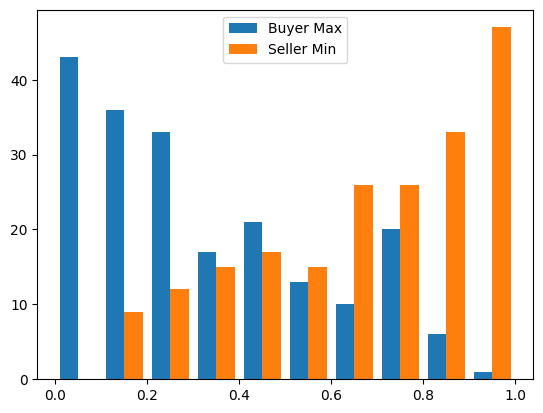

In [7]:
plt.hist([buyer_max, seller_min], bins=NUM_BINS, label=['Buyer Max', 'Seller Min'])
plt.legend()
plt.show()

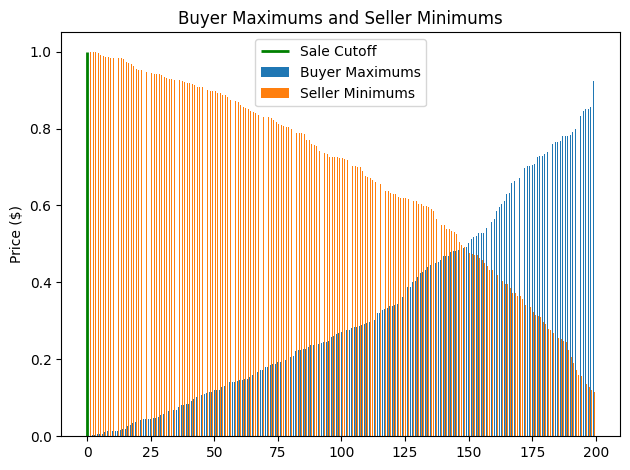

In [8]:
# Sort buyers in ascending order
sorted_buyers = sorted(enumerate(buyer_max), key=lambda x: x[1])
buyer_indices, buyer_max = zip(*sorted_buyers)

# Sort sellers in descending order
sorted_sellers = sorted(enumerate(seller_min), key=lambda x: x[1], reverse=True)
seller_indices, seller_min = zip(*sorted_sellers)

sale_cutoff = 0
# Bar width
bar_width = 0.35

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot the first set of bars (Buyer Maximums)
bars1 = ax.bar(np.arange(len(buyer_indices)), buyer_max, bar_width, label='Buyer Maximums')

# Plot the second set of bars (Seller Minimums) next to the first one
bars2 = ax.bar(np.arange(len(seller_indices)) + bar_width, seller_min, bar_width, label='Seller Minimums')

# Draw a dashed vertical line
plt.vlines(sale_cutoff, ymin=0, ymax=1, linestyle='solid', linewidth=2, color='green', label='Sale Cutoff')

# Customize the plot
ax.legend()
plt.ylabel('Price ($)')
plt.title('Buyer Maximums and Seller Minimums')

# Fit the plot to the window
plt.tight_layout()

# Show the plot
plt.show()

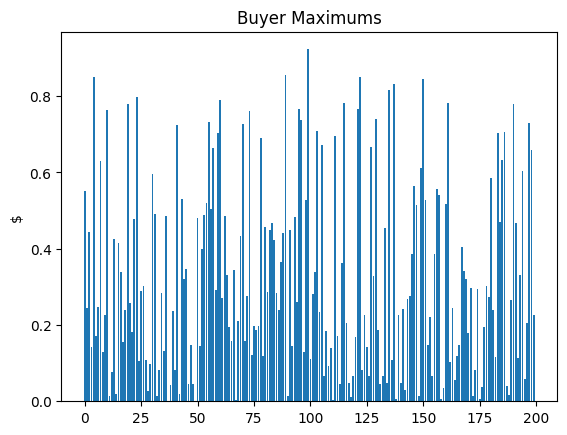

In [9]:
plt.bar(buyer_indices, buyer_max)
plt.ylabel('$')
plt.title('Buyer Maximums')
plt.show()

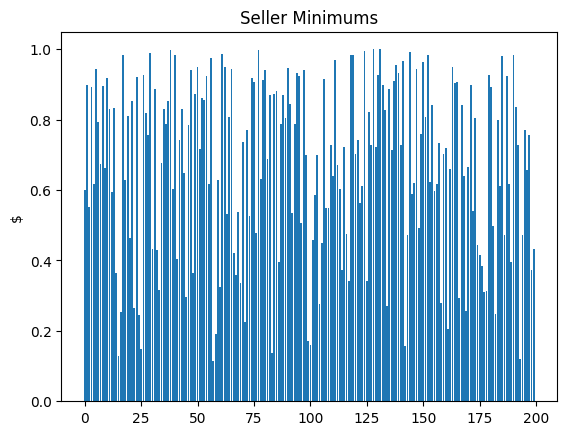

In [10]:
plt.bar(seller_indices, seller_min)
plt.ylabel('$')
plt.title('Seller Minimums')
plt.show()

# **4. Simulation**

In [11]:
sale_prices = []
avg_price = []
volume = []

for time in range(NUM_TIMES):
  # Start round
  print(f'\033[1mROUND {time+1}\033[0m')
  round_sale_prices = []
  buyer_actions = np.zeros((NUM_BUYERS))
  seller_actions = np.zeros(NUM_SELLERS)
  round_running = True
  step_counter = 0

  while round_running and step_counter<NUM_BUYERS*NUM_SELLERS:
    step_counter += 1
    available_buyers = np.where(buyer_actions == 0)[0]
    available_sellers = np.where(seller_actions == 0)[0]
    if len(available_buyers) == 0 or len(available_sellers) == 0:
        round_running = False
        break

    buyer = np.random.choice(available_buyers)
    seller = np.random.choice(available_sellers)
    if buyer_max[buyer] > seller_min[seller]:
      round_sale_prices.append((buyer_max[buyer]+seller_min[seller])/2)
      buyer_actions[buyer] = 1
      seller_actions[seller] = 1

    seller_min = np.array(seller_min)
    buyer_max = np.array(buyer_max)
    if np.min(seller_min[available_sellers]) > np.max(buyer_max[available_buyers]):
      round_running = False
      break

  for buyer in range(NUM_BUYERS):
    if buyer_actions[buyer] == 0:
      buyer_max[buyer] *= (1+FEAR)
    else:
      buyer_max[buyer] *= (1-GREED)

  for seller in range(NUM_SELLERS):
    if seller_actions[seller] == 0:
      seller_min[seller] *= (1-FEAR)
    else:
      seller_min[seller] *= (1+GREED)

  print(f'Average Sale Price: ${np.average(round_sale_prices)}')
  print(f'Number of Sales: {len(round_sale_prices)}\n')
  sale_prices.append(round_sale_prices)
  avg_price.append(np.average(round_sale_prices))
  volume.append(len(round_sale_prices))

ROUND 1
Average Sale Price: $0.5081473878942234
Number of Sales: 79

ROUND 2
Average Sale Price: $0.5024619213808403
Number of Sales: 74

ROUND 3
Average Sale Price: $0.4809249452154857
Number of Sales: 74

ROUND 4
Average Sale Price: $0.47468959011828726
Number of Sales: 71

ROUND 5
Average Sale Price: $0.47310904905677287
Number of Sales: 81

ROUND 6
Average Sale Price: $0.460440037279467
Number of Sales: 80

ROUND 7
Average Sale Price: $0.4502318323620495
Number of Sales: 75

ROUND 8
Average Sale Price: $0.44289871790869684
Number of Sales: 103

ROUND 9
Average Sale Price: $0.42684685459461236
Number of Sales: 105

ROUND 10
Average Sale Price: $0.4189625503640065
Number of Sales: 111

ROUND 11
Average Sale Price: $0.4098987867790329
Number of Sales: 111

ROUND 12
Average Sale Price: $0.4019588573802629
Number of Sales: 109

ROUND 13
Average Sale Price: $0.392368771306662
Number of Sales: 121

ROUND 14
Average Sale Price: $0.3868649384516955
Number of Sales: 110

ROUND 15
Average Sal

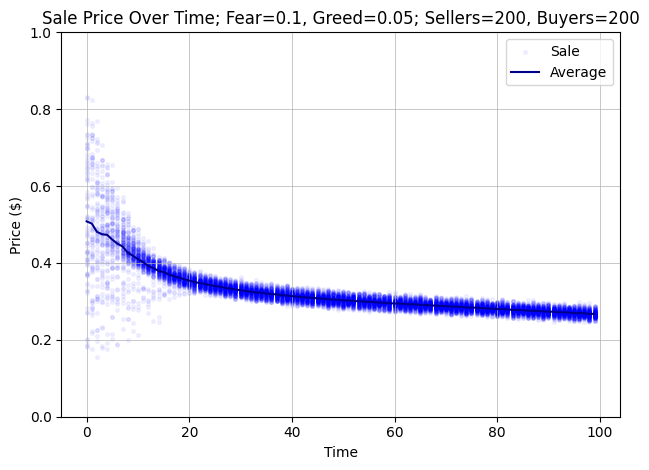

In [12]:
for round in range(NUM_TIMES):
  round_prices = sale_prices[round]
  if round == 0:
    plt.scatter(round*np.ones((len(round_prices)), dtype=np.int32), round_prices, color='blue', alpha=0.05, s=7, label='Sale')
  else:
    plt.scatter(round*np.ones((len(round_prices)), dtype=np.int32), round_prices, color='blue', alpha=0.05, s=7)

plt.plot(avg_price, color='darkblue', label='Average')

plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title(f'Sale Price Over Time; Fear={FEAR}, Greed={GREED}; Sellers={NUM_SELLERS}, Buyers={NUM_BUYERS}')
plt.grid(linestyle='-', linewidth=0.5)

plt.ylim(0, max(1, max(max(sublist) for sublist in sale_prices)+0.05))

plt.legend()

plt.tight_layout()

plt.show()

# **5. Results**

### **5.1 NUM_SELLERS = NUM_BUYERS = 100**

![picture](https://drive.google.com/uc?export=view&id=1HLbI98hQIB701WN24fs4bgUtZahgyqo0)

![picture](https://drive.google.com/uc?export=view&id=1KZa6GzsQq7NibfJdAxx1dlprlEGzTin7)

![picture](https://drive.google.com/uc?export=view&id=1hKU12bpat5Y-_4-L9BINHCJYT9uq_Rev)

![picture](https://drive.google.com/uc?export=view&id=1EsSua4tW7rHiPOkcgEUV9X0n7KuTZpDt)

![picture](https://drive.google.com/uc?export=view&id=1fC7M6enk2LGs8E9ecs27z1lCPtE-3Z0F)